In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [4]:
df.set_index('Month', inplace = True)

In [5]:
df.columns = ['Passengers']

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def check_stationarity(data):
    test = adfuller(data)
    adft = pd.Series(test[:4], index= ['Test-stats','P-value','Lags-used','Datapoints-used'])
    return adft

In [8]:
check_stationarity(df['Passengers'])

Test-stats           0.815369
P-value              0.991880
Lags-used           13.000000
Datapoints-used    130.000000
dtype: float64

<Axes: xlabel='Month'>

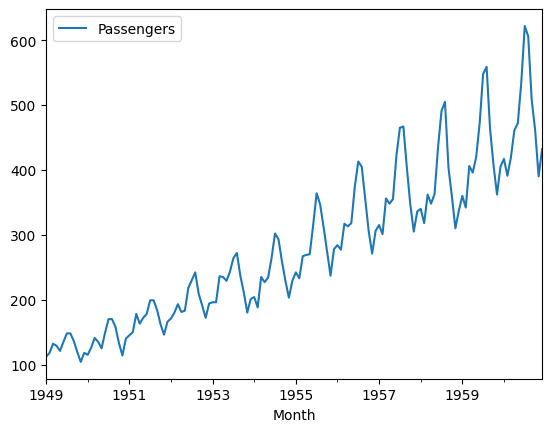

In [9]:
df.plot()

In [10]:
df['Seasonal_first_difference'] = df['Passengers'].diff(12)

In [11]:
check_stationarity(df['Seasonal_first_difference'].dropna())

Test-stats          -3.383021
P-value              0.011551
Lags-used            1.000000
Datapoints-used    130.000000
dtype: float64

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

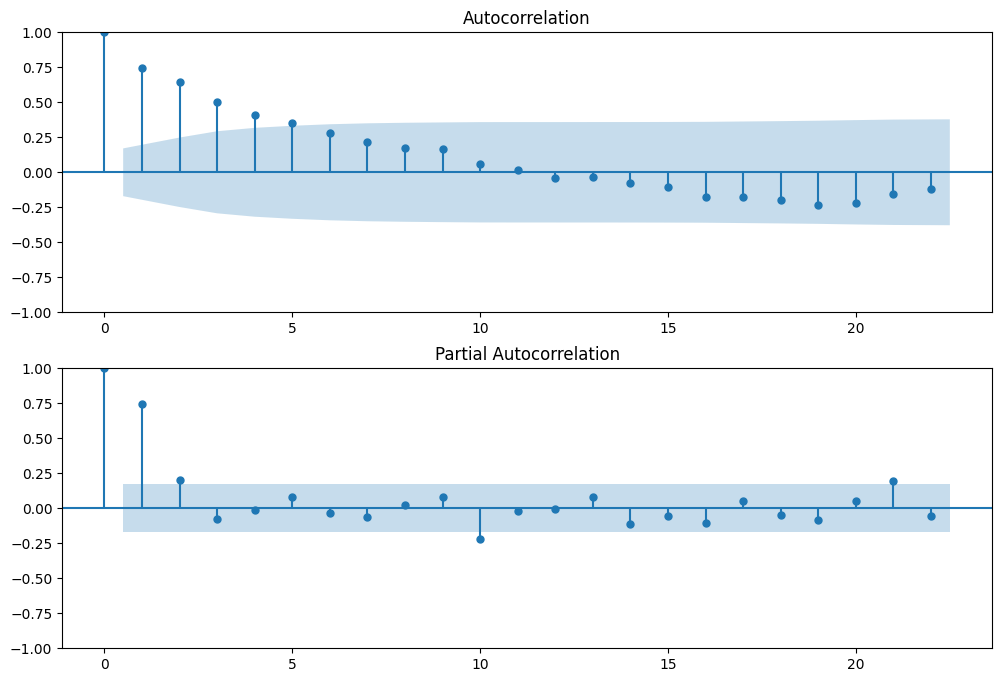

In [13]:
fig, axes = plt.subplots(2,1, figsize = (12,8))
plot_acf(df['Seasonal_first_difference'].dropna(), ax = axes[0])
plot_pacf(df['Seasonal_first_difference'].dropna(), ax = axes[1])
plt.show()

In [14]:
df

,Passengers,Seasonal_first_difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


In [16]:
import statsmodels.api as sm
m = sm.tsa.statespace.SARIMAX(df['Passengers'], order= (2,1,5), seasonal_order= (2,1,5,12))
model = m.fit()

C:\Users\tanwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\tanwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

In [17]:
df['Forecast'] = model.predict(start = 100, end = 144, dynamic = True)

<Axes: xlabel='Month'>

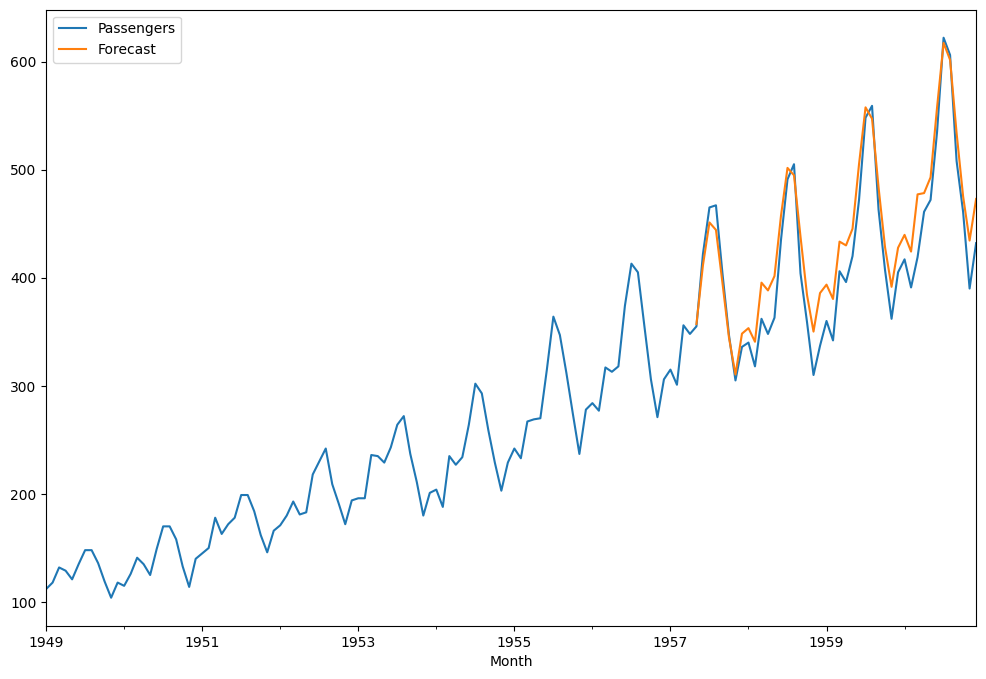

In [18]:
df[['Passengers','Forecast']].plot(figsize = (12,8))

In [19]:
from pandas.tseries.offsets import DateOffset

In [20]:
forecast = [df.index[-1]+ DateOffset(months = x) for x in range(0,24)]
forecasted_df = pd.DataFrame(index = forecast[1:], columns = df.columns)
final_df = pd.concat([df,forecasted_df])

In [21]:
final_df['Forecast'] = model.predict(start = 143, end = 167, dynamic = True)

<Axes: >

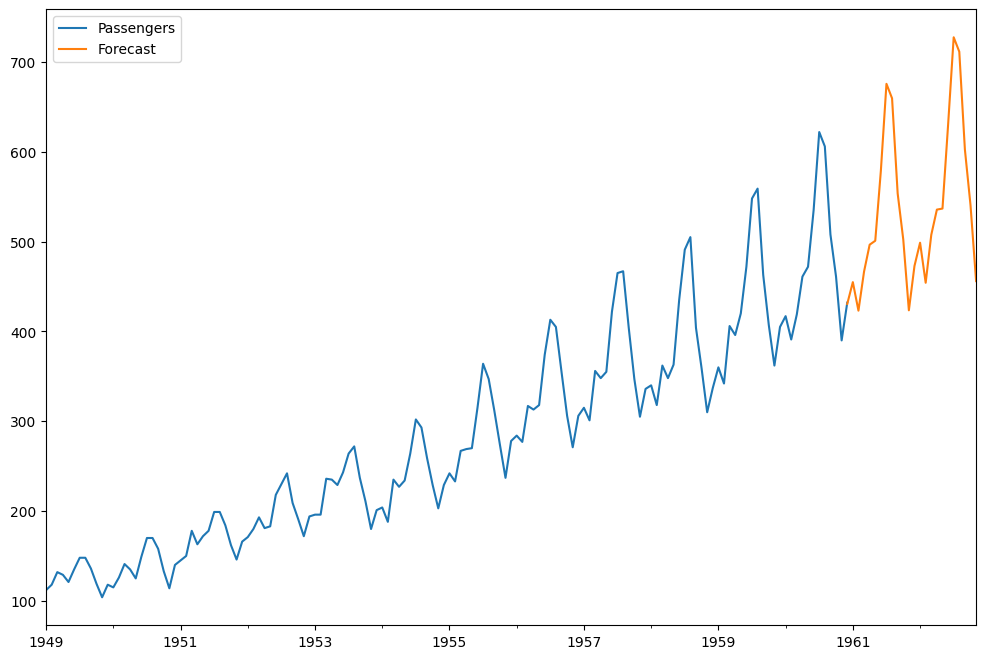

In [22]:
final_df[['Passengers','Forecast']].plot(figsize = (12,8))